<h1><center>IBM Data Science Course Capstone Project</center></h1>




<h3><center>Thai Hai Ngan</center></h3>


<h3><center>May 2020</center></h3>


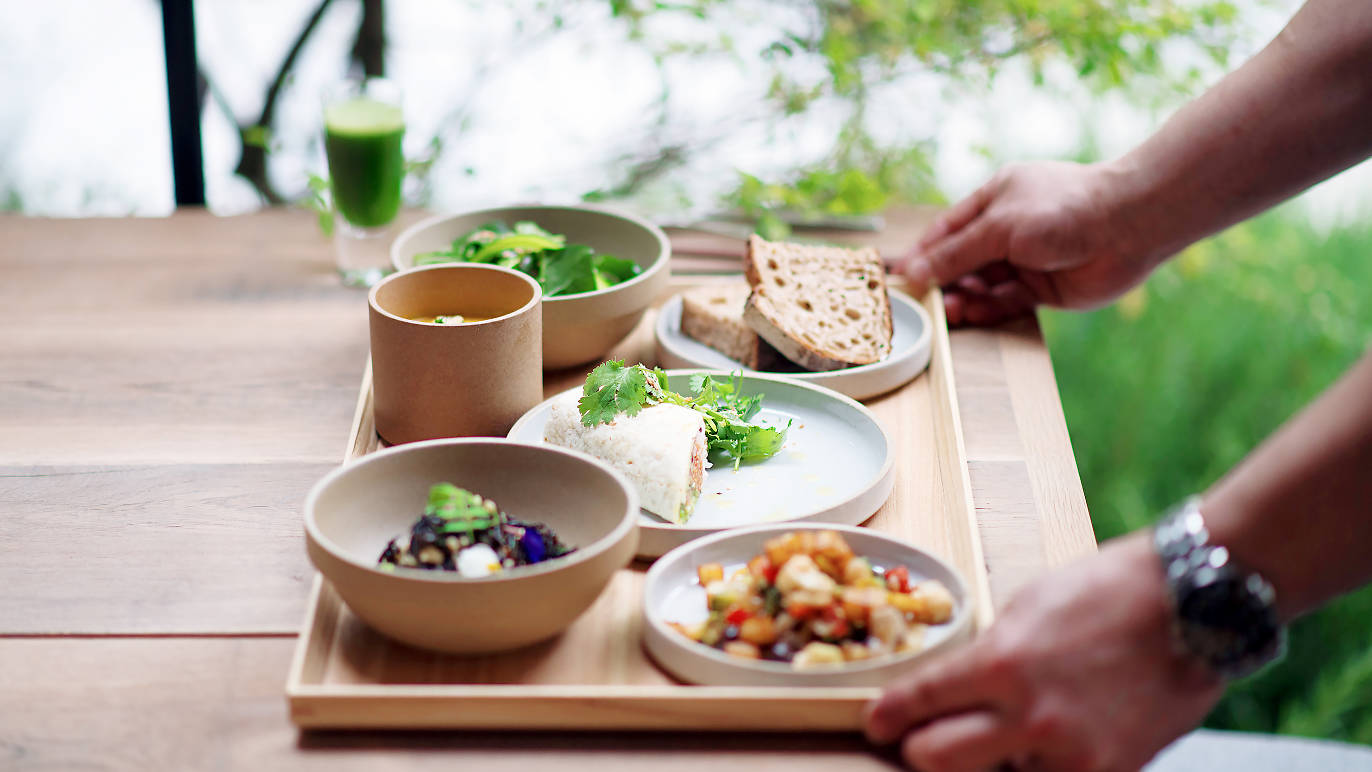

## 1. Introduction

I have been acquiring skills related to data science by taking the IBM Data Science Professional Course on Coursera. The last course contains a capstone project. This project is about applying data science toolset and obtained skills to analyze a problem in reality and creating value. My project's theme concerns a topic that I have been really interested in: Food & Beverage industry. My analysis was performed in Python. The details are pushed to Github, containing detailed report and the Jupyter notebook. I will link them at the end of the report.

## 2. Business Problem 

My client decide to open a new restaurant in Ho Chi Minh City, Vietnam. In recent years, there is a big boom in all-day brunch&bakery. She is keen on opening a new unit, which will focus on the American and Asian fusion vegetarian kitchen. Taking into account the financial plan at which the restaurant will operate, the intent is to find an optimal location in an area, where vegetarian all-day brunch is booming. The following criteria should be considered:
 - Accessibility for tourists and local citizens (transportation)
 - Nearby competitors
 - Metropolitan area
 
The assumption behind the analysis is that we can use unsupervised machine learning to create clusters of districts that will provide us with a list of areas for potential locations for the restaurant. The purpose is that the restaurant to be situated close to one of high populated areas and touristic hotspots, with less competition, and easily accessed to.

## 3. Data

To perform this analysis, we will need the following data:
 - List of the districts of Ho Chi Minh City
 - Geo-coordinates of the districts in Ho Chi Minh City
 - Top venues of districts
 
List of districts will be obtained from https://www.gso.gov.vn/dmhc2015/Default.aspx

Geo-coordinates of districts will be obtained with the help of the geocoder tool in the notebook.

Top venues data will be obtained from Foursquare through an API.

## 4. Methodology

As a database, I used GitHub repository in my study. My master data has the main components Districts and their Latitude/Longitude.

**First, I import all neccessary library**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


**Then I read csv file of data**

In [2]:
dfhcmc = pd.read_csv('Hcmcdist.csv')
dfhcmc

,District Code,District
0,760,District 1
1,761,District 12
2,762,Thu Duc District
3,763,District 9
4,764,Go Vap District
5,765,Binh Thanh District
6,766,Tan Binh District
7,767,Tan Phu District
8,768,Phu Nhuan District
9,769,District 2


**To add longitude and latitude, I called Google Geocode API**

In [3]:
column_names = ['District Code', 'District', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbors = pd.DataFrame(columns=column_names)

neighbors

,District Code,District,Latitude,Longitude


In [4]:
district = dfhcmc['District']
district

0               District 1
1              District 12
2        Thu Duc District 
3               District 9
4         Go Vap District 
5     Binh Thanh District 
6       Tan Binh District 
7        Tan Phu District 
8      Phu Nhuan District 
9               District 2
10              District 3
11             District 10
12             District 11
13              District 4
14              District 5
15              District 6
16              District 8
17      Binh Tan District 
18              District 7
19       Cu Chi  District 
20       Hoc Mon District 
21     Binh Chanh District
22         Nha Be District
23        Can Gio District
Name: District, dtype: object

In [5]:
districtcode = dfhcmc['District Code']

name = dfhcmc['District']
location = None
latitude = None
longitude = None


for data in range(0, len(districtcode)):
    dt = districtcode[data]
    nm = name[data] + " Ho Chi Minh city"
    
    try: 
        geolocator = Nominatim(user_agent="my-project")
        location = geolocator.geocode('{}'.format(nm))
        latitude = location.latitude
        longitude = location.longitude
        neighbors = neighbors.append({ 'District Code':dt,'District':name[data],'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)
    except:
        print(nm)

Can Gio District Ho Chi Minh city


In [6]:
neighbors

,District Code,District,Latitude,Longitude
0,760,District 1,10.774540,106.699184
1,761,District 12,10.747343,106.666116
2,762,Thu Duc District,10.822023,106.718302
3,763,District 9,10.747343,106.666116
4,764,Go Vap District,10.840150,106.671083
5,765,Binh Thanh District,10.804659,106.707848
6,766,Tan Binh District,10.797979,106.653805
7,767,Tan Phu District,10.791640,106.627302
8,768,Phu Nhuan District,10.800118,106.677042
9,769,District 2,10.804963,106.747470


In [7]:
neighbors.shape

(23, 4)

**As you can notice, we have only 23 districts here and that is due to the error with geocode that failed to retrieve latitude of Can Gio District. As a result, I decided to proceed with the data I had obtained. Also, the district is outskirts and unlikely to have a material impact on the analysis.**

### Map of Ho Chi Minh City with showing the districts

In [8]:
map_hcmc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hcmc)  
    
map_hcmc

### Exploring districts with Foursquare

In [9]:
CLIENT_ID = 'D5R1PEFBMIT5WKBIA1MII3EOGF5YSY5U1ATRBZCNPOT0EGDB' 
CLIENT_SECRET = 'UUUMZG3BPOOUVG1OWD5M13JRUSNDK4IE5LXHBUSADFDHUN0N'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D5R1PEFBMIT5WKBIA1MII3EOGF5YSY5U1ATRBZCNPOT0EGDB
CLIENT_SECRET:UUUMZG3BPOOUVG1OWD5M13JRUSNDK4IE5LXHBUSADFDHUN0N


**Exploring the first district**

In [10]:
neighbors.loc[0, 'District']


'District 1'

In [11]:
neighborhood_latitude = neighbors.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighbors.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighbors.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude,
                                                               search_query = 'venues'))

Latitude and longitude values of District 1 are 10.7745397, 106.69918361158545.


In [12]:
radius = 1000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=D5R1PEFBMIT5WKBIA1MII3EOGF5YSY5U1ATRBZCNPOT0EGDB&client_secret=UUUMZG3BPOOUVG1OWD5M13JRUSNDK4IE5LXHBUSADFDHUN0N&v=20180604&ll=10.7745397,106.69918361158545&radius=1000&limit=100'

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecf021cb1cac0001b0cb287'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': 'With specials', 'key': 'specials'}]},
  'headerLocation': 'Bến Thành',
  'headerFullLocation': 'Bến Thành, Ho Chi Minh City',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 225,
  'suggestedBounds': {'ne': {'lat': 10.783539709000008,
    'lng': 106.70832802877652},
   'sw': {'lat': 10.765539690999992, 'lng': 106.69003919439439}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57d94726498e3405bc9c26b4',
       'name': "Pizza 4P's",
       'location': {'address': '8 Thủ Khoa Huân, District 1',
        'lat': 10.77330135301938,
        'lng': 106.69759947485072,
 

**Clean data**

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Pizza 4P's,57d94726498e3405bc9c26b4,Pizza Place,10.773301,106.697599
1,Pasteur Street Brewing Company,54a92801498e9a30915fdc11,Brewery,10.775220,106.700894
2,O Lé,5284c73d11d2eda69c58c5ee,Spanish Restaurant,10.774772,106.699524
3,Annam Gourmet Saigon Centre,579c6af2cd106b2f79887caf,Supermarket,10.773204,106.700435
4,Liberty Central Saigon Citypoint Hotel,5465cc52498ecc34fd0a9eb8,Hotel,10.774758,106.700795


In [16]:
#fix the column names

nearby_venues.columns = [col.split(".")[1] for col in nearby_venues.columns]

nearby_venues.head()

,name,id,categories,location,location
0,Pizza 4P's,57d94726498e3405bc9c26b4,Pizza Place,10.773301,106.697599
1,Pasteur Street Brewing Company,54a92801498e9a30915fdc11,Brewery,10.775220,106.700894
2,O Lé,5284c73d11d2eda69c58c5ee,Spanish Restaurant,10.774772,106.699524
3,Annam Gourmet Saigon Centre,579c6af2cd106b2f79887caf,Supermarket,10.773204,106.700435
4,Liberty Central Saigon Citypoint Hotel,5465cc52498ecc34fd0a9eb8,Hotel,10.774758,106.700795


**Explore other districts**

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
hcmc_venues = getNearbyVenues(names=neighbors['District'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

District 1
District 12
Thu Duc District 
District 9
Go Vap District 
Binh Thanh District 
Tan Binh District 
Tan Phu District 
Phu Nhuan District 
District 2
District 3
District 10
District 11
District 4
District 5
District 6
District 8
Binh Tan District 
District 7
Cu Chi  District 
Hoc Mon District 
Binh Chanh District
Nha Be District


In [19]:
print(hcmc_venues.shape)
hcmc_venues.head()

(736, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,District 1,10.77454,106.699184,Pizza 4P's,10.773301,106.697599,Pizza Place
1,District 1,10.77454,106.699184,Pasteur Street Brewing Company,10.775220,106.700894,Brewery
2,District 1,10.77454,106.699184,O Lé,10.774772,106.699524,Spanish Restaurant
3,District 1,10.77454,106.699184,Annam Gourmet Saigon Centre,10.773204,106.700435,Supermarket
4,District 1,10.77454,106.699184,Liberty Central Saigon Citypoint Hotel,10.774758,106.700795,Hotel


In [20]:
hcmc_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Binh Chanh District,2,2,2,2,2,2
Binh Tan District,4,4,4,4,4,4
Binh Thanh District,28,28,28,28,28,28
Cu Chi District,6,6,6,6,6,6
District 1,100,100,100,100,100,100
District 10,73,73,73,73,73,73
District 11,9,9,9,9,9,9
District 12,28,28,28,28,28,28
District 2,28,28,28,28,28,28


I will check how many distinct venue categories we have 

In [21]:
print('There are {} uniques categories.'.format(len(hcmc_venues['Venue Category'].unique())))

There are 120 uniques categories.


### Analyzing districts

In [22]:
# one hot encoding
hcmc_onehot = pd.get_dummies(hcmc_venues[['Venue Category']], prefix="",prefix_sep="")

# add neighborhood column back to dataframe
hcmc_onehot['Neighborhood'] = hcmc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hcmc_onehot.columns[-1]] + list(hcmc_onehot.columns[:-1])

hcmc_onehot = hcmc_onehot[fixed_columns]

hcmc_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Korean Restaurant,Market,Massage Studio,Mattress Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Multiplex,Museum,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Paintball Field,Park,Pet Café,Pharmacy,Pizza Place,Pool,Ramen Restaurant,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Trail,Travel Agency,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar
0,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,District 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
hcmc_onehot.shape

(736, 121)

**Top 5 most common venues of each neighborhood**

In [24]:
hcmc_grouped = hcmc_onehot.groupby('Neighborhood').mean().reset_index()
hcmc_grouped.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Korean Restaurant,Market,Massage Studio,Mattress Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mongolian Restaurant,Movie Theater,Multiplex,Museum,Noodle House,North Indian Restaurant,Opera House,Outdoors & Recreation,Paintball Field,Park,Pet Café,Pharmacy,Pizza Place,Pool,Ramen Restaurant,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Trail,Travel Agency,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar
0,Binh Chanh District,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.50,0.000000,0.0,0.00,0.0,0.000000,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.500000,0.0,0.0,0.00
1,Binh Tan District,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000,0.50,0.0,0.25,0.00,0.00,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.25,0.0,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.00
2,Binh Thanh District,0.0,0.00,0.035714,0.0,0.035714,0.0,0.0,0.00,0.0,0.035714,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.035714,0.0,0.00,0.0,0.000000,0.25,0.0,0.00,0.00,0.00,0.071429,0.035714,0.0,0.00,0.00,0.00,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.035714,0.035714,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.035714,0.035714,0.00,0.0,0.071429,0.00,0.00,0.0,0.0,0.035714,0.00,0.00,0.0,0.035714,0.035714,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.035714,0.00,0.071429,0.0,0.0,0.00
3,Cu Chi District,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.166667,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.166

In [25]:
num_top_venues = 5

for hood in hcmc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hcmc_grouped[hcmc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Binh Chanh District----
                   venue  freq
0  Vietnamese Restaurant   0.5
1                Brewery   0.5
2    American Restaurant   0.0
3          Movie Theater   0.0
4                   Pool   0.0


----Binh Tan District ----
                                      venue  freq
0                                      Café  0.50
1                        Chinese Restaurant  0.25
2                             Shopping Mall  0.25
3                       American Restaurant  0.00
4  Residential Building (Apartment / Condo)  0.00


----Binh Thanh District ----
                   venue  freq
0                   Café  0.25
1            Coffee Shop  0.07
2     Seafood Restaurant  0.07
3  Vietnamese Restaurant  0.07
4                  Diner  0.07


----Cu Chi  District ----
                   venue  freq
0            Karaoke Bar  0.17
1                 Market  0.17
2                  Hotel  0.17
3  Vietnamese Restaurant  0.17
4               Pharmacy  0.17


----District 1----
     

Put the above information into dataframe

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hcmc_grouped['Neighborhood']

for ind in np.arange(hcmc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hcmc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Binh Chanh District,Vietnamese Restaurant,Brewery,Whisky Bar,Flower Shop,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
1,Binh Tan District,Café,Chinese Restaurant,Shopping Mall,Whisky Bar,Flea Market,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,Binh Thanh District,Café,Coffee Shop,Seafood Restaurant,Vietnamese Restaurant,Diner,Road,Bubble Tea Shop,Convenience Store,Soup Place,French Restaurant
3,Cu Chi District,Hotel,Karaoke Bar,Bus Station,Market,Pharmacy,Vietnamese Restaurant,Golf Course,Film Studio,Convention Center,Cupcake Shop
4,District 1,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Japanese Restaurant,Vegetarian / Vegan Restaurant,Spa,Massage Studio,Hotel Bar,Restaurant
5,District 10,Vietnamese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Soup Place,Dessert Shop,Gym / Fitness Center,Korean Restaurant,Frozen Yogurt Shop,Brewery
6,District 11,Café,Water Park,Shopping Mall,Asian Restaurant,Cantonese Restaurant,Theme Park,Basketball Stadium,Electronics Store,Film Studio,Fast Food Restaurant
7,District 12,Vietnamese Restaurant,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Food,Bakery,Dessert Shop,Gym / Fitness Center,Dumpling Restaurant,Breakfast Spot
8,District 2,Restaurant,Vietnamese Restaurant,Café,Bakery,French Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Art Gallery,Burger Joint,Residential Building (Apartment / Condo)
9,District 3,Hotel,Coffee Shop,Vietnamese Restaurant,Café,Massage Studio,Spa,Bar,Italian Restaurant,Hotpot Restaurant,French Restaurant


### Using Machine Learning for Clustering Neighborhoods¶

**For clustering, K-means method will be applied. To be able to select the optimal number of clusters, I will use the silhouette score.**

First, let's find out the optimal number of clusters. For that, I will create a graph of the silhouette scores.

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [53]:
max_range = 8

hcmc_grouped_clustering = hcmc_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    n_clusters = kclusters
    kmc = hcmc_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.31766326058275424)
For n_clusters = 3, silhouette score is 0.2934693104030061)
For n_clusters = 4, silhouette score is 0.2769531214545777)
For n_clusters = 5, silhouette score is 0.21291435505245665)
For n_clusters = 6, silhouette score is 0.16068362755092586)
For n_clusters = 7, silhouette score is 0.1523873203372235)


**As we can see, n_clusters = 2 is the optimal cluster number for Kmean algorithm. To strengthen the result, I will plot graph of Silhouette score**

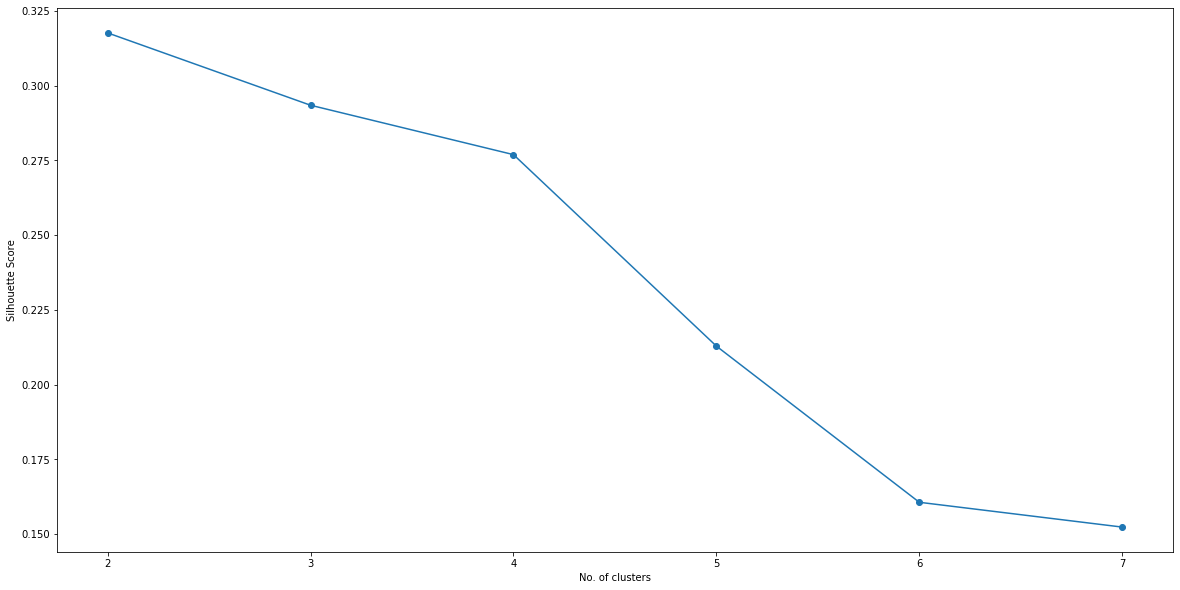

In [45]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

**It can be seen from the graph above that the optimal number of clusters is also 2.**

**Now let's run the K-means clustering with the optimal number of clusters, which is 2.**

In [46]:
# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(hcmc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [47]:
hcmc_merged = neighbors

# merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
hcmc_merged = hcmc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hcmc_merged.head()

,District Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,760,District 1,10.774540,106.699184,0,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Japanese Restaurant,Vegetarian / Vegan Restaurant,Spa,Massage Studio,Hotel Bar,Restaurant
1,761,District 12,10.747343,106.666116,0,Vietnamese Restaurant,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Food,Bakery,Dessert Shop,Gym / Fitness Center,Dumpling Restaurant,Breakfast Spot
2,762,Thu Duc District,10.822023,106.718302,0,Vietnamese Restaurant,Seafood Restaurant,Coffee Shop,Park,Shopping Mall,Asian Restaurant,Café,Multiplex,Diner,Electronics Store
3,763,District 9,10.747343,106.666116,0,Vietnamese Restaurant,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Food,Bakery,Dessert Shop,Gym / Fitness Center,Dumpling Restaurant,Breakfast Spot
4,764,Go Vap District,10.840150,106.671083,2,Café,Vietnamese Restaurant,Shopping Mall,Boutique,Warehouse Store,Coffee Shop,Tea Room,Dumpling Restaurant,Fast Food Restaurant,Farmers Market


**Visualizing clusters**

In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hcmc_merged['Latitude'], hcmc_merged['Longitude'], hcmc_merged['Neighborhood'], hcmc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining Clusters¶


#### Cluster 1


In [56]:
hcmc_merged.loc[hcmc_merged['Cluster Labels'] == 0, hcmc_merged.columns[[1] + list(range(5, hcmc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,District 1,Vietnamese Restaurant,Hotel,Coffee Shop,Café,Japanese Restaurant,Vegetarian / Vegan Restaurant,Spa,Massage Studio,Hotel Bar,Restaurant
1,District 12,Vietnamese Restaurant,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Food,Bakery,Dessert Shop,Gym / Fitness Center,Dumpling Restaurant,Breakfast Spot
2,Thu Duc District,Vietnamese Restaurant,Seafood Restaurant,Coffee Shop,Park,Shopping Mall,Asian Restaurant,Café,Multiplex,Diner,Electronics Store
3,District 9,Vietnamese Restaurant,Dim Sum Restaurant,Chinese Restaurant,Coffee Shop,Food,Bakery,Dessert Shop,Gym / Fitness Center,Dumpling Restaurant,Breakfast Spot
5,Binh Thanh District,Café,Coffee Shop,Seafood Restaurant,Vietnamese Restaurant,Diner,Road,Bubble Tea Shop,Convenience Store,Soup Place,French Restaurant
6,Tan Binh District,Café,Coffee Shop,Vietnamese Restaurant,Seafood Restaurant,Multiplex,Stadium,Noodle House,Convention Center,Pizza Place,Fast Food Restaurant
8,Phu Nhuan District,Café,Coffee Shop,Vietnamese Restaurant,Hotel,Asian Restaurant,Bookstore,Gym / Fitness Center,Spa,BBQ Joint,Chinese Restaurant
9,District 2,Restaurant,Vietnamese Restaurant,Café,Bakery,French Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Art Gallery,Burger Joint,Residential Building (Apartment / Condo)
10,District 3,Hotel,Coffee Shop,Vietnamese Restaurant,Café,Massage Studio,Spa,Bar,Italian Restaurant,Hotpot Restaurant,French Restaurant
11,District 10,Vietnamese Restaurant,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Soup Place,Dessert Shop,Gym / Fitness Center,Korean Restaurant,Frozen Yogurt Shop,Brewery


#### Cluster 2

In [57]:
hcmc_merged.loc[hcmc_merged['Cluster Labels'] == 1, hcmc_merged.columns[[1] + list(range(5, hcmc_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Binh Chanh District,Vietnamese Restaurant,Brewery,Whisky Bar,Flower Shop,Convention Center,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


## 5. Results
By looking at the cluster data, we can see that cluster 1 is the one that we are the most interested in.
Cluster 1 (Cluster label 0) is the biggest cluster. Recall the  criteria that we set at the beginning of this analysis and evaluate:
 - Accessibility for tourists and local citizens (transportation): Among the top common venue are hotels, which is ideal for attracting tourists. Bus stops are nearby, rendering easiness of access to our restaurant.
 - Nearby competitors: Although there are a number of restaurants (Vietnamese restaurants, Dim Sum restaurants,...), there are not many café, especially all-day brunch with American and Asian fusion vegetarian style.
 - Metropolitan area: There are flea markets, markets, parks, gym centers, multiplexes, convenience stores and so forth. It is a promising point of highly populated areas. It leads to opportunity of large customer number coming to our newly open restaurant.
 
The second cluster (Cluster label 1) is an outer district where café is not really represented (restaurants and bars are among the top).

## 6. Recommendation
Based on what we learned about the clusters, we can advise the restaurant owner to consider the districts from cluster 1 as a prospective location for the new restaurant. These are the districts where our planned business model is well represented and also hotels are frequent. These satisfy the three original criteria that the location should be in a metropolitan centre, with less competition and in a location that customers can easily find.

## 7. Conclusion
This report discussed the process of finding an answer for a hypothetical though real-life like business concern. The analysis was performed based mainly on the toolset of data science and the utilization of Python and Python libraries such as Pandas, Scikit, Folium, and so on. The output of the analysis offers recommendations for the business problem in question.

***